# Oliver Medgyesi

## Research question/interests

I am mainly interested in resarching the average salary of an individual, more specifically kelowna residents, and how affordable the current housing market is. I will also determine what factors are most significant in impacting the price of housing and how we can attempt to lower them. Columns 48, 52, and 54 from our dataset will be used to analyze my resarch question.

### My Primary Question:

1. **How does the affordability of housing in Canada vary relative to the average monthly net salary, and what factors such as population density, location and demand may be driving or affecting these discrepancies. Also, how does Kelowna compare in terms of housing prices compared to other cities in Canada.**

> To answer this question, I am going to analyze the data on the average monthly net saraly and the cost of apartments in various canadian locations. I will then calculate the average cost of housing as a percentage of the average salary in each location. I will also focus on the considerable changes in the affordability of housing in Kelowna. I will also explore the potential factors that possibly contribute to these differences.
---
### Supporting Questions Regarding Housing Affordability and the Average Salary:


2. **Is there a correlation between the price of housing and the cost of living and is it impacted by outside factors such as population and density?**
 
 > To answer this question, we will need to find if there is a correlation between the price of housing and the cost of living. We can use regression to examine the relationships between housing prcies and the multiple factors listed. By anaylyzing this way, we will be able to determine if there is any relationship bonded from these categories. If so, we will determine which factor has the greatest impact on the price of housing. 

3. **What percentage of the average salary in Kelowna is required to afford the current housing prices and how has this changed overtime?**

 > I am going to focus on examining the trends over time to determine if there is any correlation between the changes in kelowna residents average salary and the changes in housing affordability. By examining this data over different intervals of time, I will find if there are any significant changes or fluxuations in the housing market.




---

In [2]:
# Required Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import folium

sns.set_theme(style="ticks", font_scale=1.3)
plt.rc("axes.spines", top=False, right=False)
sns.set(rc={'figure.figsize':(5,8)})

In [12]:
# Loading our Data and Functions.

from code import project_functions_medgyesi as medgy

df = pd.read_csv("../data/processed/cost-of-living-RENAMED.csv")


# Exploring the Dataset

Here is a list of some ways to explore the dataset:

1. We can use the head() function to get the first few rows of our dataset. It is hard to interperate these column names, so lets rename all the columns to their corresponding values.

2. The info() method can be used to gather a summary of the dataset which includes, columns, data types, and NaN values.

3. We can use the shape function to get the size of the dataset.

4. We can use the describe function to describe to get a summary of each individual column in the dataset.

5. Lets calculate the total number of NaN Values inside of the dataset, then create a column that calculates each specific amount of NaN values. I also want to see which columns contain more than 3 NaN values. This is because anything with more than 3 is considered to be bad quality data and cannot be included in our research. 

6. We can visualize the greatest to least amount of NaN values inside of the dataset and then we can remove them.

In [ ]:
df.head()
df.info()
df.shape
df.describe

# All functions used to explore our dataset.

In [5]:
df = df[['city', 'country', 
    #'x1', 'x2', 
    'x3 (McMeal)', #McDonalds
    #'x4', 'x5', 'x6', 'x7', 'x8',
    'x9 (milk)','x10 (bread)', 'x11 (rice)', 'x12 (eggs)', 'x13 (cheese local)',
    'x14 (chicken fillets)', 'x15 (beef round)', 'x16 (apples)',
    'x17 (bananas)', 'x18 (oranges)', 'x19 (tomatoes)', 'x20 (potatoes)',
    'x21 (onions)', 'x22 (lettuce)', 'x23 (water 1.5L)', #Groceries
    #'x24', 'x25', 'x26', 'x27', 
    'x28 (One-Way ticket transit)', 'x29 (monthly pass transit)',
    'x30 (taxi start)', 'x31 (taxi 1km)', 'x32 (Taxi 1hr wait)',
    'x33 (Gas 1L)', 
    "x34 (Volkswagen Golf)", "x35 (Toyota Corolla Sedan)",  # Transport
    'x36 (basic utilities)', #Basic
    #'x37','x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 
    'x48 (apartment 1BR city center)',
    'x49 (apartment 1BR outside center)', 'x50 (apartment 3BR city center)',
    'x51 (apartment 3BR outside center)', 'x52 (price per sqm city center)',
    'x53 (price per sqm outside center)',#Shelter
    'x54 (average monthly net salary)', #Monthly net salary (after tax)
    'x55 (mortgage interest rate)', 
    'data_quality']].copy()

Total number of NaN values: 29845


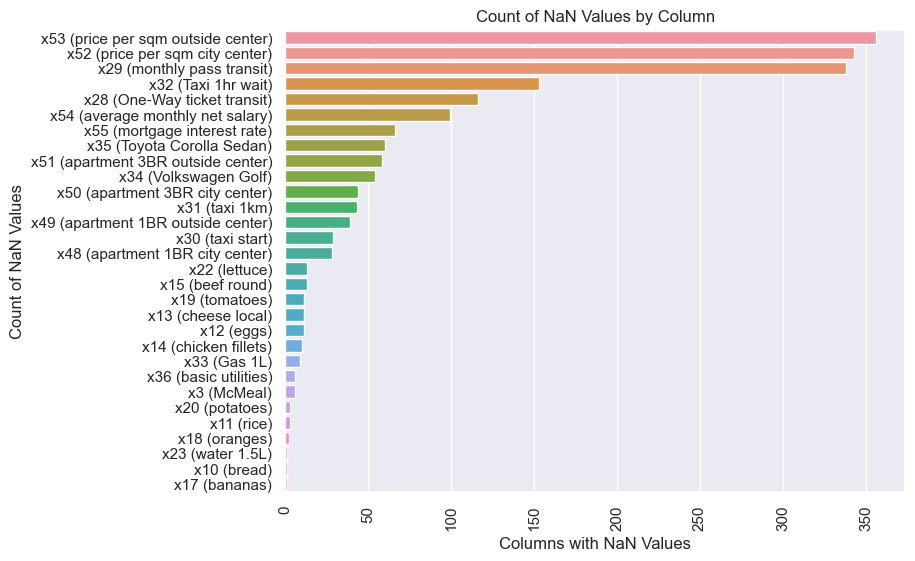

In [6]:
total_nans = df.isna().sum().sum()
print(f'Total number of NaN values: {total_nans}')
df['Num_NaN'] = df.isnull().sum(axis=1)


mask = df.isna().sum(axis=1) <= 3
cost_living_clean = df[mask]
nan_cols = cost_living_clean.isna().any()
nan_cols = nan_cols[nan_cols].index.tolist()

nan_counts = cost_living_clean[nan_cols].isna().sum().sort_values(ascending=False)

sns.set_palette("pastel")

nan_counts = cost_living_clean.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
nan_counts = nan_counts.sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(y=nan_counts.index, x=nan_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns with NaN Values")
plt.ylabel("Count of NaN Values")
plt.title("Count of NaN Values by Column")
plt.show()

# Cleaning the Dataset

Here are some ways we can clean our dataset:

1. First we can handle any dupliactes that appear in our dataset by using the drop_duplicates() method.

2. We can use the isnull() method to identify any null or NaN values inside of the dataset. Then, we can use the dropna() method to get rid of them.,

3. We can determine if there are any inconsistencies inside of our dataset. If there are any inconsistencies, then we will remove them from the dataset.

4. We can also remove any outliers inside of the specific columns we are going to use. 

5. Drop all bad quality data from the dataset.

In [7]:
# Handling any Duplicates.

df = df.drop_duplicates()
df.isnull
df.dropna

# Removing any inconsistencies

inconsistent_data = df.apply(lambda x: len(x.unique()) == 1)
cost_living_df = df.loc[:, ~inconsistent_data]
inconsistent_data

# Removing any outliers 

def remove_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    df = df[~((df< (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
    return df

# Dropping all "Bad Quality Data"

df.drop(df[df['data_quality'] == 0].index, inplace=True)
df.isna().sum().sort_values(ascending=False).head(10)
df.shape

(923, 37)

# Visualizing some of our Data

First we can create a heatmap to see which factors have a significant correlation.



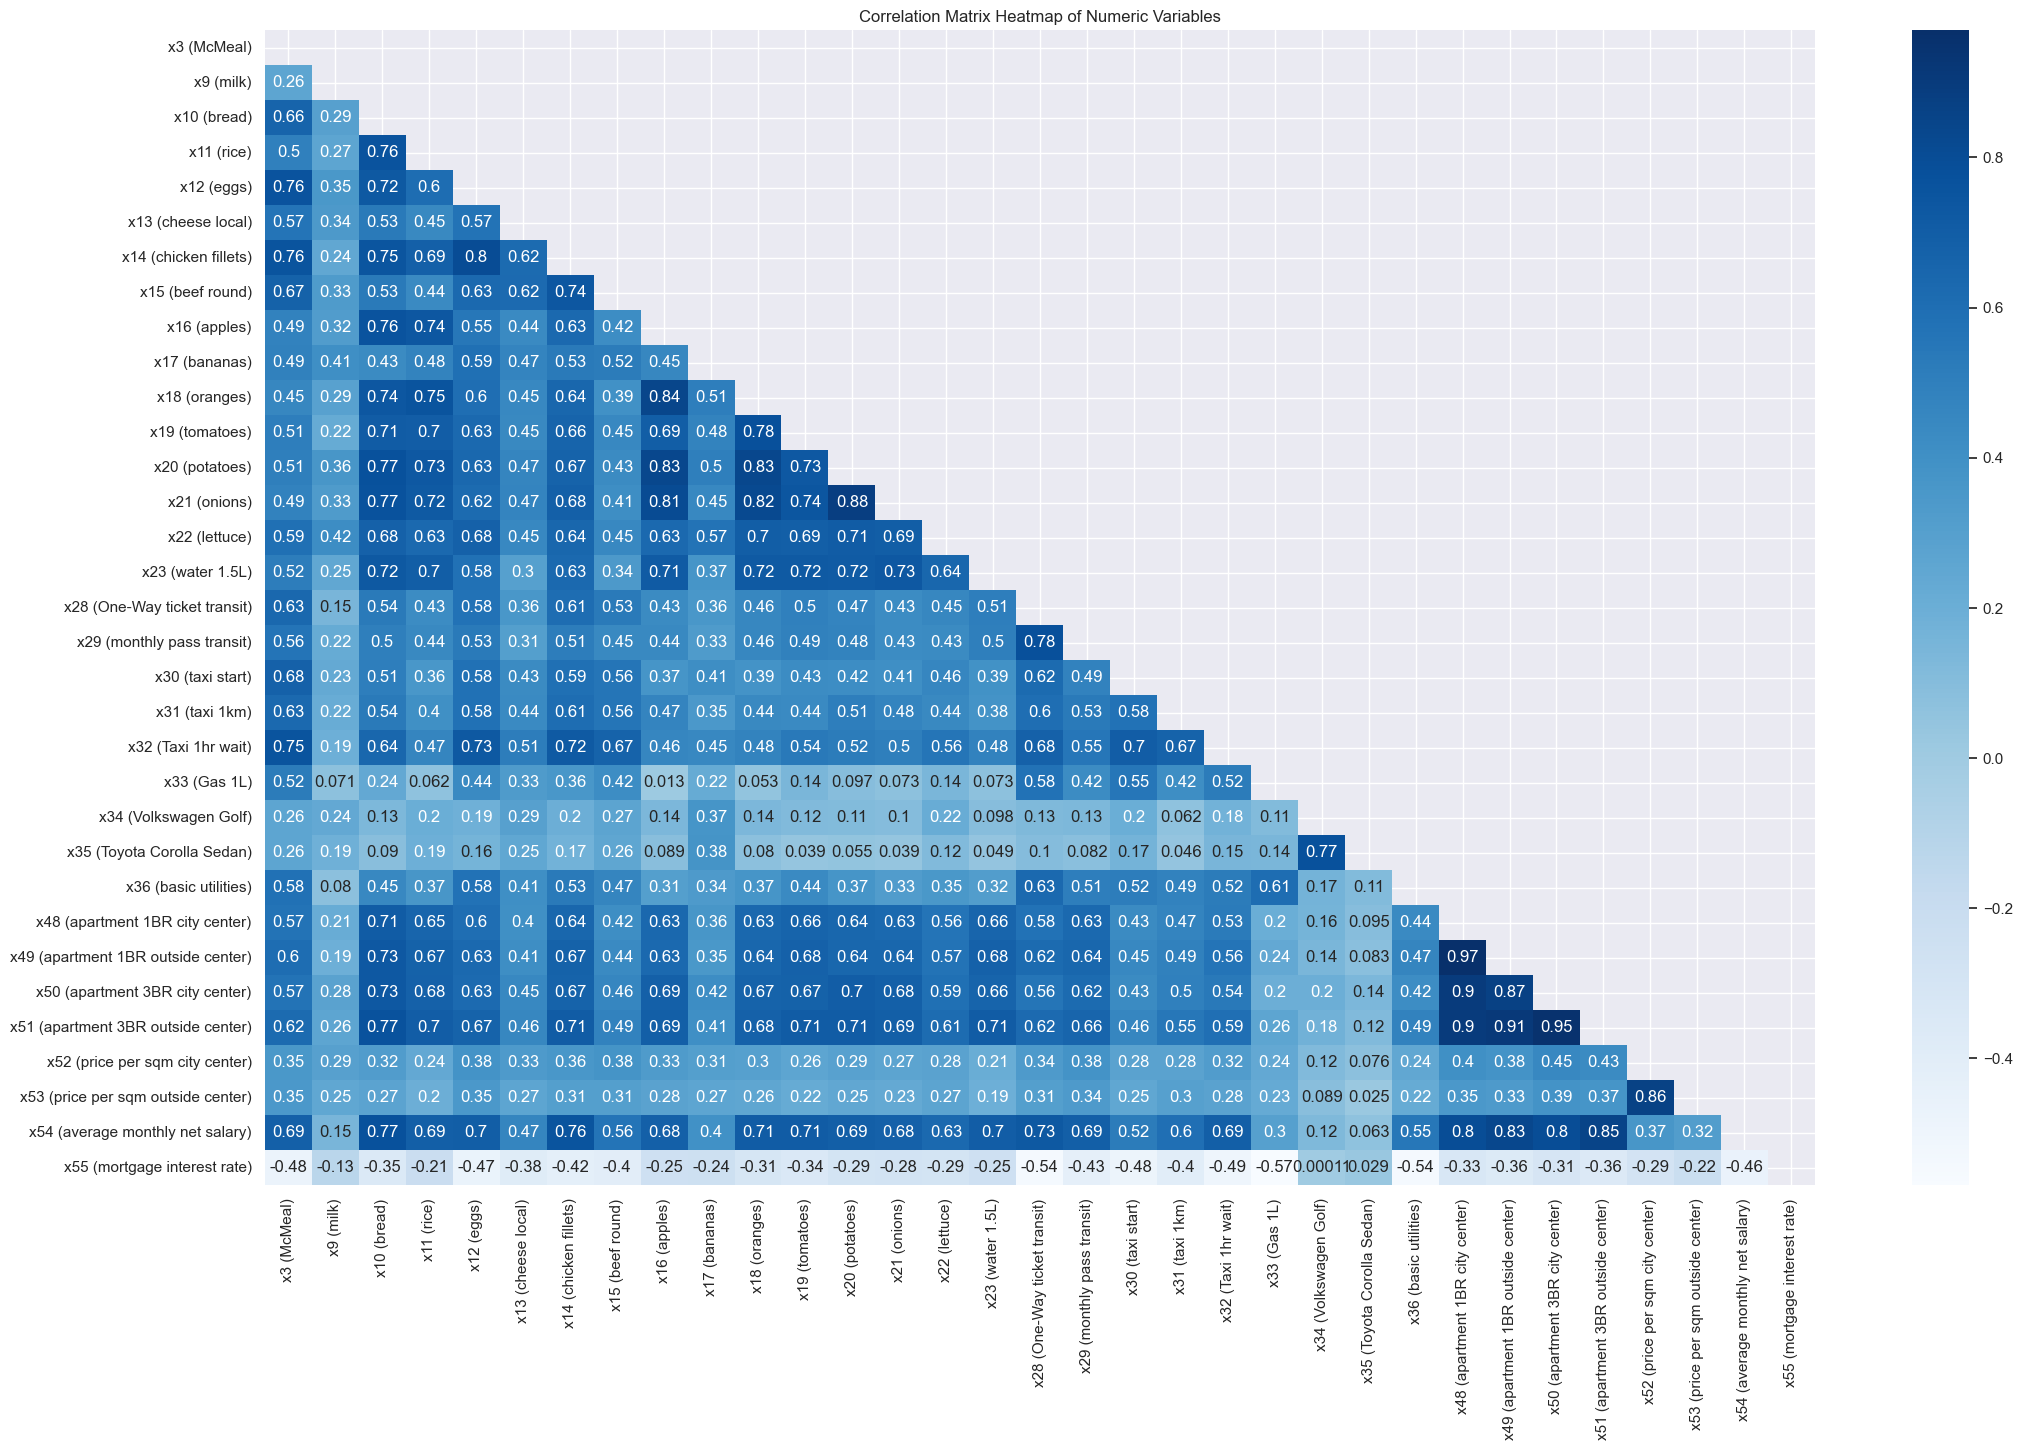

In [8]:
plt.figure(figsize=(25,15))
plt.title("Correlation Matrix Heatmap of Numeric Variables")
df_filtered = df.drop(columns=["data_quality","Num_NaN"])
corr = df_filtered.corr(numeric_only = True,)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues',mask=mask)
plt.show()

Now that we can visually see all the possible correlations, lets investigate some possible positive and negative correlations. 

Strongest Correlation: Apartment 1BR Outside City Center and Apartment 1BR Inside City Center (0.97)

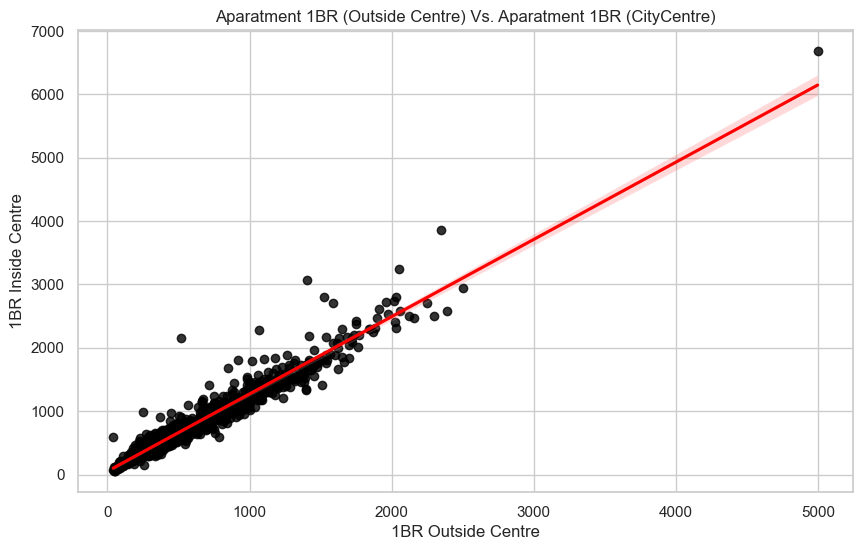

In [59]:
sns.set_style("whitegrid")

x = df["x49 (apartment 1BR outside center)"]
y = df["x48 (apartment 1BR city center)"]

plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, color="black", line_kws={"color": "red"})
plt.xlabel("1BR Outside Centre")
plt.ylabel("1BR Inside Centre")
plt.title("Aparatment 1BR (Outside Centre) Vs. Aparatment 1BR (CityCentre)")

plt.show()

As we can see there is a 0.97 correlation between the two. The reason for this may be that there is a strong demand for housing outside of the centre and inside the city. Another reason for this correlation would be the location. City centers tend to have ammenties making them more expensive which would create a correlation.

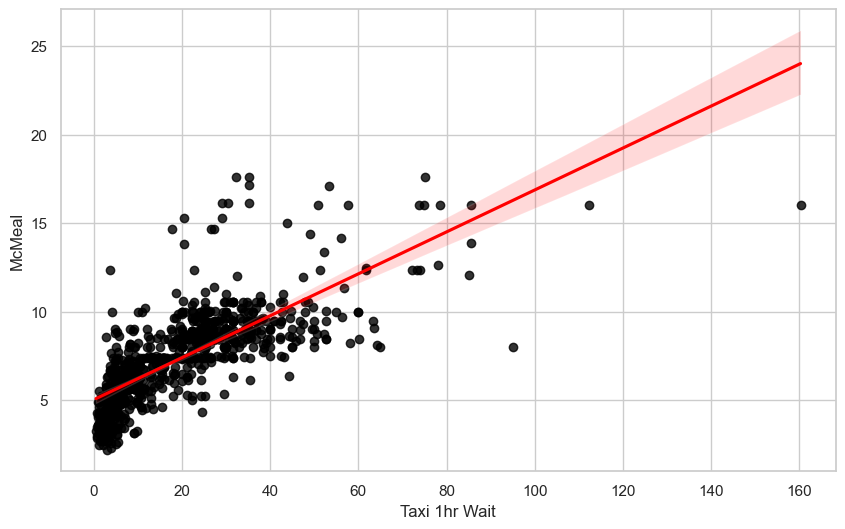

In [58]:
sns.set_style("whitegrid")

x = df["x32 (Taxi 1hr wait)"]
y = df["x3 (McMeal)"]

plt.figure(figsize=(10, 6))
sns.regplot(x=x, y=y, color="black", line_kws={"color": "red"})
plt.xlabel("Taxi 1hr Wait")
plt.ylabel("McMeal")
plt.title("")
plt.show()

Another strong correlation is between a taxi wait time and a McMeal. This correlation could be cause by indivuals who tend to purchase fast-food while waiting for a taxi.

# Creating the Canada Dataframe

In this section i will be creating a "Canada" dataframe that contains all of the cities in Canada. This way it is a lot easier to compare the housing prices in Kelowna to other cities. Now we need to see which cities contain more than 3 NaN values in order to filter our data.

In [ ]:
canada_df = df[df["country"] == "Canada"]

canada_housing_df = canada_df[['city', "x48 (apartment 1BR city center)", "x49 (apartment 1BR outside center)", "x50 (apartment 3BR city center)", "x51 (apartment 3BR outside center)",
            "x52 (price per sqm city center)",  "x53 (price per sqm outside center)", "x54 (average monthly net salary)", "x55 (mortgage interest rate)",]]

city_counts = canada_housing_df.groupby("city").apply(lambda x: x.isna().sum().sum())
bad_cities = city_counts[city_counts >= 3].index.tolist()

canada_housing_df = canada_housing_df[~canada_housing_df["city"].isin(bad_cities)]
canada_housing_df.reset_index(drop=True)

canada_housing_df

Lets compare the price per square meter outside the city of Kelowna to Vancouver, Calgary, and Winnpeg.

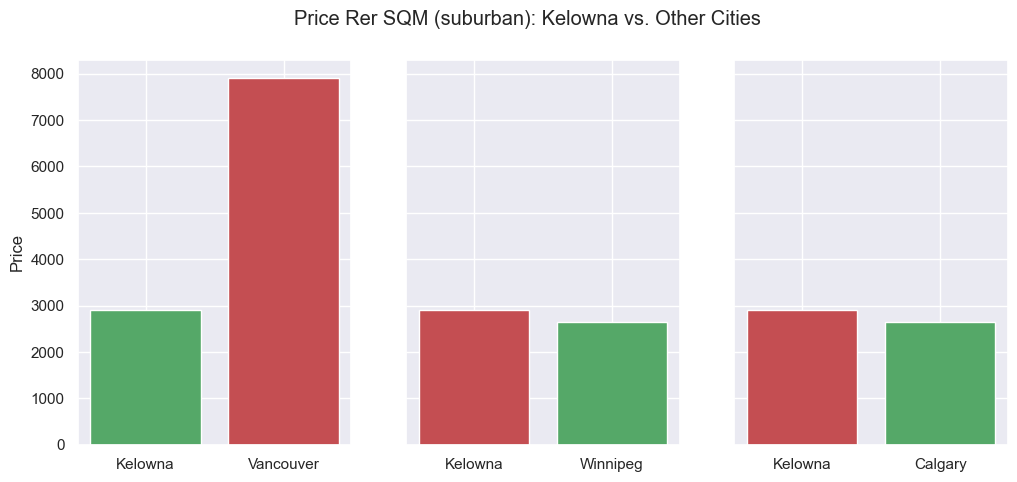

In [14]:
cities = ["Kelowna", "Vancouver", "Calgary", "Winnipeg"]
df_cities = canada_housing_df[canada_housing_df['city'].isin(cities)]
df_kelowna = df_cities[df_cities['city'] == 'Kelowna']
df_vancouver = df_cities[df_cities['city'] == 'Vancouver']
df_winnipeg = df_cities[df_cities['city'] == 'Winnipeg']
df_calgary = df_cities[df_cities['city'] == 'Calgary']


fig, axs = plt.subplots(1, 3, figsize=(12, 5), sharey=True)

# Setting Colors
kelowna_vancouver_color = 'g' if df_kelowna['x53 (price per sqm outside center)'].values[0] < df_vancouver['x53 (price per sqm outside center)'].values[0] else 'r'
kelowna_winnipeg_color = 'g' if df_kelowna['x53 (price per sqm outside center)'].values[0] < df_winnipeg['x53 (price per sqm outside center)'].values[0] else 'r'
kelowna_calgary_color = 'g' if df_kelowna['x53 (price per sqm outside center)'].values[0] < df_calgary['x53 (price per sqm outside center)'].values[0] else 'r'

# Kelowna vs Vancouver
axs[0].bar(x=[0, 1], height=[df_kelowna['x53 (price per sqm outside center)'].values[0],
                             df_vancouver['x53 (price per sqm outside center)'].values[0]],
           color=[kelowna_vancouver_color, 'r'])
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Kelowna', 'Vancouver'])
axs[0].set_ylabel('Price')

# Kelowna vs Winnipeg
axs[1].bar(x=[0, 1], height=[df_kelowna['x53 (price per sqm outside center)'].values[0],
                             df_winnipeg['x53 (price per sqm outside center)'].values[0]],
           color=[kelowna_winnipeg_color, 'g'])
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Kelowna', 'Winnipeg'])

# Kelowna vs Calgary
axs[2].bar(x=[0, 1], height=[df_kelowna['x53 (price per sqm outside center)'].values[0],
                             df_calgary['x53 (price per sqm outside center)'].values[0]],
           color=[kelowna_calgary_color, 'g'])
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Kelowna', 'Calgary'])

plt.suptitle('Price Rer SQM (suburban): Kelowna vs. Other Cities')
plt.show()

In this visualization, the cities that are colored in green indicate that is is cheaper than its adversary (red). Compared to Vancouver, Winnipeg, and Calgary, Kelowna is only considered to be cheaper that Vancouver. Kelowna is ranked #18 on the list of least expensive to most expensive based on affordability ratio which means that Vancouver is close to being one of the most expensive cities in Canada for housing. Another conclusion we can draw is that Calgary and Winnipeg are very similar in pricing for suburban housing. 

# Statistics for the Canada Dataframe

First, I am going to create a new dataframe that contains the Mean, Median, STD, Min, and Max values for all of Canada.

In [15]:
mean = canada_housing_df.mean(numeric_only=True)
median = canada_housing_df.median(numeric_only=True)
std = canada_housing_df.std(numeric_only=True)
minimum = canada_housing_df.min()
maximum = canada_housing_df.max()

stats_df = pd.concat([mean, median, std, minimum, maximum], axis=1)
stats_df.columns = ['Mean', 'Median', 'Std', 'Min', 'Max']

stats_df

,Mean,Median,Std,Min,Max
x48 (apartment 1BR city center),1157.127024,1164.740,348.297457,415.04,2445.79
x49 (apartment 1BR outside center),1049.099167,1003.750,337.388715,426.16,2297.56
x50 (apartment 3BR city center),1978.277619,1862.135,709.785781,713.36,4211.95
x51 (apartment 3BR outside center),1727.396190,1677.170,523.377171,629.98,3025.87
x52 (price per sqm city center),5173.407458,4651.100,2647.034849,1412.05,11966.5
x53 (price per sqm outside center),3970.123684,3416.950,2175.260574,555.86,9573.2
x54 (average monthly net salary),3023.122105,3093.005,791.794517,1334.07,5188.05
x55 (mortgage interest rate),5.553810,5.440,1.287025,2.0,8.75
city,NaN,NaN,NaN,Abbotsford,Yellowknife


From creating this new dataframe, we can see that Abbotsford has some of the lowest statistics, while Yellowknife is on the opposite end. Due to Yellowstone being so remote, the cost of living and housing is more expensive than in other places. This also indicates why the average monthly net salary is much more as necessities are more expensive due to their scarcity.

General Conclusions from the Overall Data:

- The mean and median rent for a 1BR apartment (city center) is higher than an apartmenet that is located outside of the city center. This might suggest that the cost of living is generally more expensive in the city. This can also apply to the 3BR apartments in the city as they are greater in sive and are more expensive than suburban homes.

- The mean and median price per square meter in the city is higher than that of real estate located in suburban areas. Generally, this suggests that desirable ammenities are located nearby so individuals dont need to drive. 


Lets visualize the Min vs Max values of "stats_df" which contains the most expensive housing vs the least expensive.

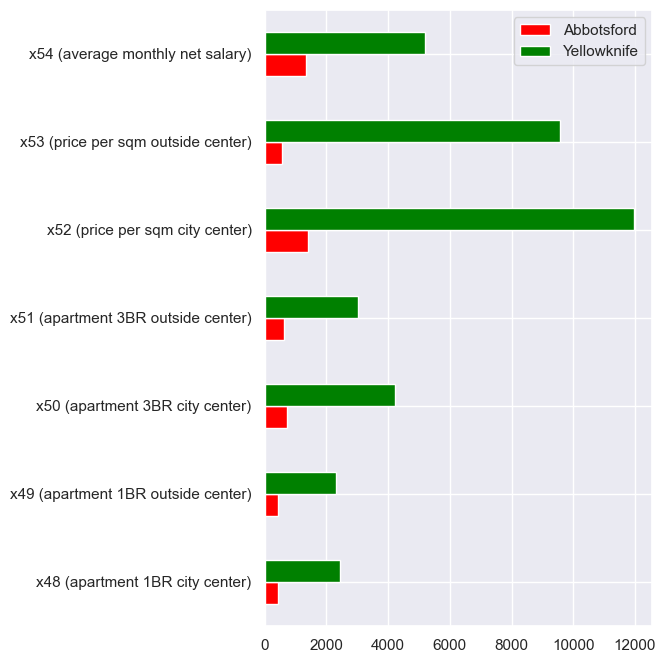

In [16]:
min_df = stats_df['Min']
max_df = stats_df['Max']
new_labels = {'Min': 'Abbotsford', 'Max': 'Yellowknife'}

minmax_df = pd.DataFrame(stats_df, columns=['Min', 'Max'], index=['x48 (apartment 1BR city center)', 'x49 (apartment 1BR outside center)', 'x50 (apartment 3BR city center)', 'x51 (apartment 3BR outside center)', 'x52 (price per sqm city center)', 'x53 (price per sqm outside center)', 'x54 (average monthly net salary)'])
minmax_df = minmax_df.rename(columns=new_labels)

colors = ['red' if c == 'Abbotsford' else 'green' for c in minmax_df.columns]
minmax_df.plot.barh(color=colors)

plt.show()

# Creating our Housing Dataset

First, we need to import the new dataset containing Canadian cities, their corresponding asci codes, id, province name, longitude and latitude, population, timnezone, ranking, postal, and id.
Next we are merging the canada_housing_df with our city_df that contains the population data. For the sake of consistency, I will be renaming all the columns to pair with our new merged data. This dataset does contain some irrelevant columns so those will be removed. The columns that I wil keep are lat, long, population, density, and city.

In [ ]:
canadapop_df = pd.read_csv("../data/raw/canadacities.csv")
canpop_df  = canadapop_df.drop(['timezone','postal','id','city_ascii','province_id','province_name','ranking'], axis = 1)

interest_rate = 0.03
years = 30
canada_df = pd.merge(canada_housing_df,canpop_df)

canada_df = (canada_df
             .rename(columns={'x48 (apartment 1BR city center)': 'apartment 1BR city center', 'x49 (apartment 1BR outside center)': 'apartment 1BR outside center', 
                              'x50 (apartment 3BR city center)': 'apartment 3BR city center', 'x51 (apartment 3BR outside center)': 'apartment 3BR outside center',
                              'x52 (price per sqm city center)': 'price per sqm city center', 'x53 (price per sqm outside center)': 'price per sqm outside center', 
                              'x54 (average monthly net salary)': 'average monthly net salary', 'x55 (mortgage interest rate)': 'mortgage interest rate'})
             
             .assign(price_per_sqm = lambda x: x[['price per sqm city center', 'price per sqm outside center']].mean(axis=1))
             .assign(affordability_ratio = lambda x: x[['apartment 1BR city center', 'apartment 1BR outside center', 'apartment 3BR city center', 
                                                        'apartment 3BR outside center','price per sqm city center','price per sqm outside center']].sum(axis=1) / x['average monthly net salary'])
             .assign(percentage_salary = lambda x: x['price_per_sqm'] * 1000 * (interest_rate/12) * ((1+(interest_rate/12))**(years*12))/(((1+(interest_rate/12))**(years*12))-1) / x['average monthly net salary'] * 100)
)

canada_df = (canada_df
             .rename(columns={'price_per_sqm': 'price per sqm', 'affordability_ratio':'affordability ratio'})
             .sort_values(by=['affordability ratio'], ascending=False)
             .drop_duplicates(subset=['city'])
             .dropna()
)

canada_df

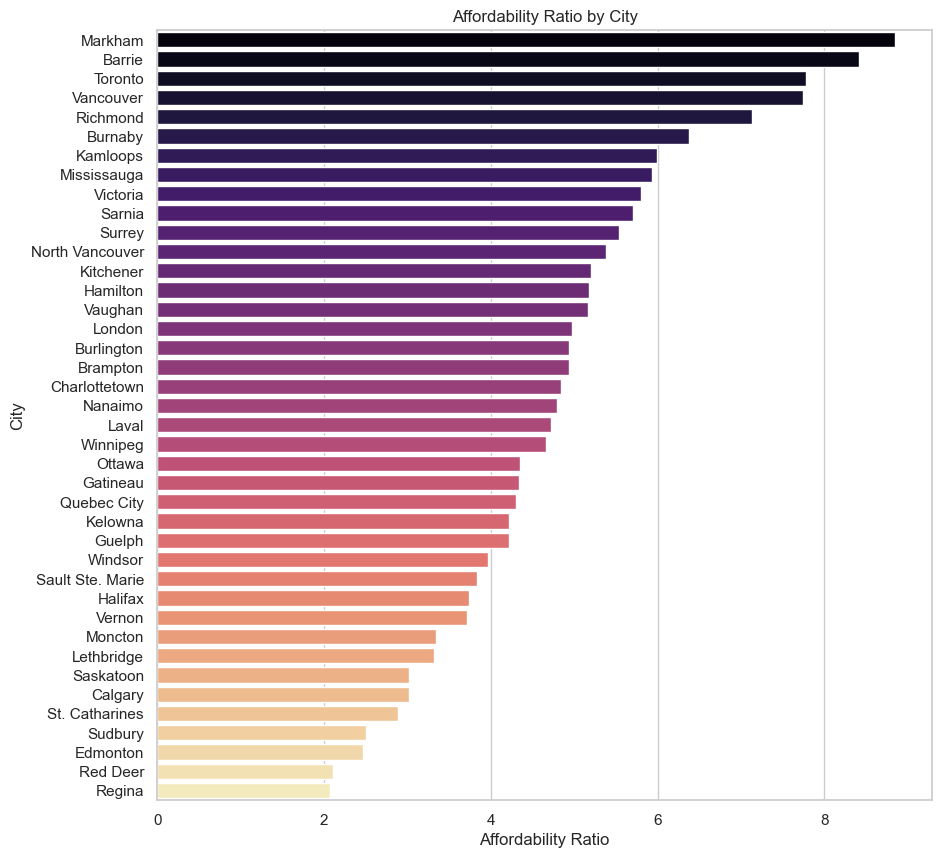

In [51]:
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x='affordability ratio', y='city', data=canada_df, palette = 'magma')

ax.set_title('Affordability Ratio by City')
ax.set_xlabel('Affordability Ratio')
ax.set_ylabel('City')

plt.show()

 From this visualization we are able to determine that Regina is considered to be the least expensive city, while Markham being the most expensive according to the affodability ratio. Another conclusion that we can make is that only 5 cities -  are below the threshold of 3.0 which include Red Deer, Regina, Edmonton, Sudbury, and St. Catharines. Markahm is a highly desirable location due to its proximity being close to major surrounding cities such as Toronto. Due to Markham being a very dense location, there is limited land supply and restrictions on new developments. On the contrary, Regina is considered to be the least expensive as it is located in the prairies, has a small population, and has a lower cost of living compared to major cities. 

---

Lets create a visualization to determine which cities are considered affordable versus expensive. I am going to do this by using the folium extension to plot each city in our dataframe (This can be see inside of my functions folder). As in the previous examples i've used, green indicates that a city is considered "affordable" and red is considered "expensive". This plot is based on the "affordability ratio" where cities that have a ratio greater than 3.0 are considered to be expensive and those less are affordable. 

In [88]:
map = medgy.new_map(canada_df, 'affordability ratio', 'lat', 'lng', 'city')

map

As we can see, the majority of cities in Canada are considered to be expensive. To be exact, lets calculate the amount of cities that are "Expensive", "Affordable", and "Moderate". This graph is based on our affordability ratio where Affordable is considered to be less than or equal to 3.0, Moderate is less than 5.5 but greater than 3.0, and Expensive is greater than 5.5.

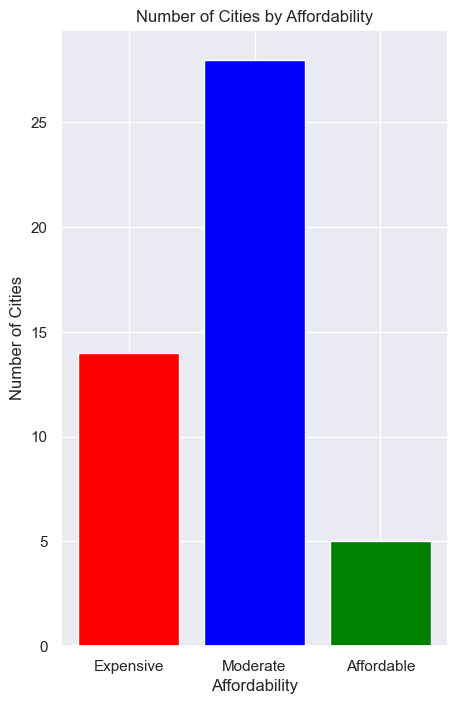

In [21]:
expensive = (canada_df['affordability ratio'] > 5.5).sum()
moderate = ((canada_df['affordability ratio'] > 3.0) & (canada_df['affordability ratio'] <= 5.5)).sum()
affordable = (canada_df['affordability ratio'] <= 3.0).sum()

colors = ['red', 'blue', 'green']
fig, ax = plt.subplots()
ax.bar(['Expensive', 'Moderate', 'Affordable'], [expensive, moderate, affordable], color=colors)

fig.patch.set_facecolor('none') 
ax.set_title('Number of Cities by Affordability')
ax.set_xlabel('Affordability')
ax.set_ylabel('Number of Cities')
plt.show()

# Conclusion

Based on the research that I have conducted, it is fair to assume that Canada is on the expensive side for real estate. Some conclusions that I have drawn throughout my project are (Based on the cities used):

- Only 27% of cities that I researched are considered to be affordable in Canada.

- 55% of cities are moderately priced, and 30% are Expensive.

- The least expensive cities are Red Deer, Regina, Edmonton, Sudbury, and St. Catharine.

- The most expensive cities are Markham, Barrie, Toroton, Vancouver, and Richmond.

- 15% of your monthly salary will go towards mortgage or rent payments in Kelowna.

- Densely populated areas are considered to be more expensive while praires and rural areas are much cheaper. I assume this is due to land availability and construction restrictions.

